57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 517.4114 - mae: 21.0703 - val_loss: 583.6089 - val_mae: 22.3344
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 498.5380 - mae: 20.5947 - val_loss: 517.2269 - val_mae: 20.7606
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 454.8229 - mae: 19.0852 - val_loss: 430.2375 - val_mae: 18.6041
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 352.3087 - mae: 16.6592 - val_loss: 323.2034 - val_mae: 15.6505
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 246.9903 - mae: 13.4950 - val_loss: 209.7134 - val_mae: 12.0697
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 139.6081 - mae: 9.7131 - val_loss: 123.7792 - val_mae: 8.6223
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84.5756 - mae: 7.2365 - val_loss: 83.1262 - val_mae: 7.0967
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 70.3615 - mae: 6.3570 - val_loss: 64.3588 - val_mae: 6.1904
Epoch 9/100
11/11 

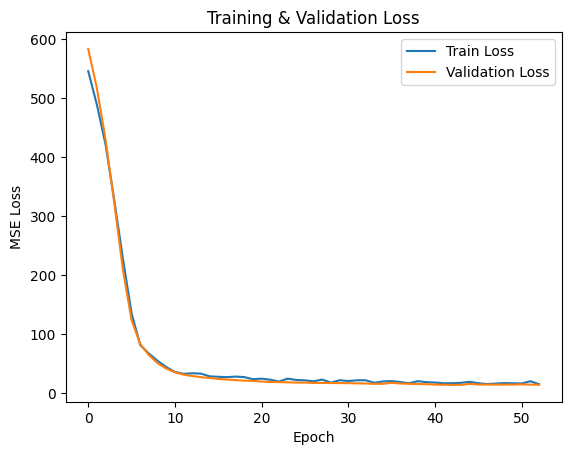

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


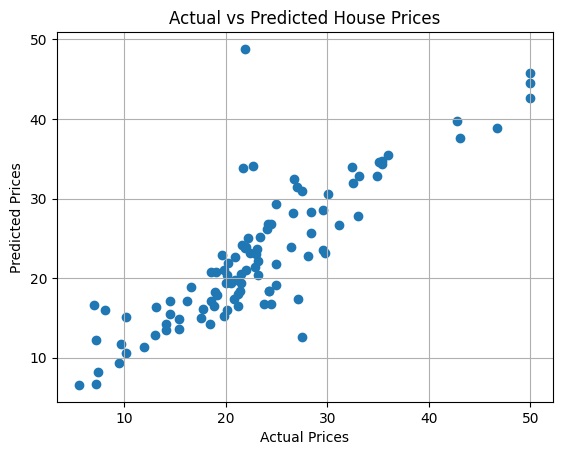

In [1]:
# Boston Housing Price Prediction using Deep Neural Network

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset directly from keras.datasets
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer (no activation for regression)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate the model
loss, mae = model.evaluate(x_test_scaled, y_test, verbose=2)
print(f"Test Mean Absolute Error: ${mae * 1000:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

# Predict and visualize
y_pred = model.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
